In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# Generate initial points (Gaussian, centered around 0,0)
np.random.seed(3347)
n = 100
x = 5.0*np.random.normal(size=n)
y = 2.0*np.random.normal(size=n)
X0 = np.vstack((x, y)).T

# Rotate points using a rotation matrix
theta = np.radians(30.0)
rot = np.array([[ np.cos(theta),-np.sin(theta)],
                [ np.sin(theta), np.cos(theta)]])
X1 = X0 @ rot.T

# Perform PCA
pca = PCA()
pca.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

21.7347624589309 [0.84127813 0.54060254]
3.4963087369366246 [-0.54060254  0.84127813]


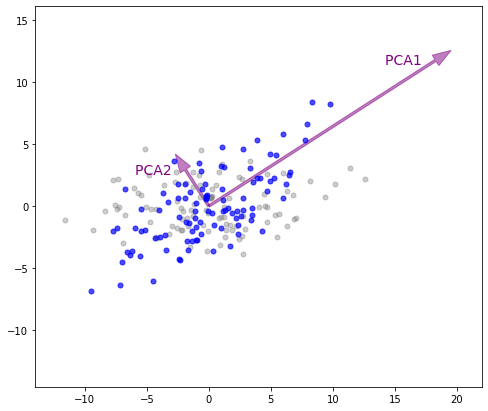

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8,7))
ax.plot(X0[:,0], X0[:,1], color='gray', marker='.', linestyle='', markersize=10, alpha=0.4)
ax.plot(X1[:,0], X1[:,1], color='blue', marker='.', linestyle='', markersize=10, alpha=0.7)
ax.axis('equal')
ax.set_xlim(-14, 22)

i=0
for eigenvalue, eigenvector in zip(pca.explained_variance_, pca.components_):
    i += 1
    print(eigenvalue, eigenvector)
    dx = eigenvalue * eigenvector[0]
    dy = eigenvalue * eigenvector[1]
    ax.arrow(0, 0, dx, dy, color='purple', width=0.2, head_width=1, alpha=0.5)
    ax.text(dx, dy, f'PCA{i}   ', color='purple', fontsize=14, ha='right', va='center')